# Notebook for [Reorient Histogram and Scatterplot with Trend Line](https://stackoverflow.com/questions/60040836/reorient-histogram-and-scatterplot-with-trend-line)

<a href="https://colab.research.google.com/github/trsvchn/stackoverflow-notebooks/blob/master/histogram-and-scatter.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
%matplotlib inline

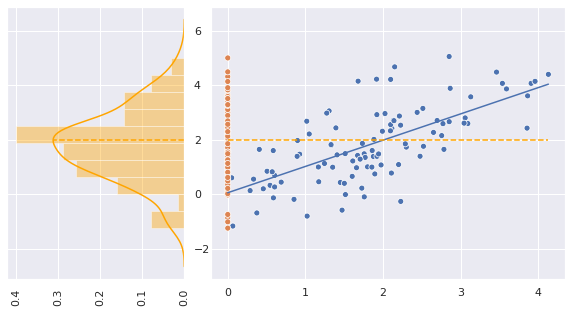

In [2]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Prepare some data

np.random.seed(2020)

mean_Y1 = 0
std_Y1 = 1
size_Y1 = 100

X1 = np.random.normal(mean_Y1, std_Y1, size_Y1)
X1 = X1 - np.min(X1)
Y1 = X1 + np.random.normal(mean_Y1, std_Y1, size_Y1)

# this for computing trend line
Z = np.polyfit(X1, Y1, 1)
Y_ = np.poly1d(Z)(X1)

mean_Y0 = 2
std_Y0 = 1.2
size_Y0 = 100

X0 = np.zeros(100)
Y0 = np.random.normal(mean_Y0, std_Y0, size_Y0)

X = np.concatenate((X1, X0))
Y = np.concatenate((Y1, Y0))

# Now time for plotting

fig, axs = plt.subplots(1, 2,
                        sharey=True,
                        figsize=(10, 5),
                        gridspec_kw={'width_ratios': (1, 2)}
                       )
# control space between plots
fig.subplots_adjust(wspace=0.1)

# set the ticks for y-axis:
axs[0].yaxis.set_tick_params(left=False, labelleft=False, labelright=True)
# if you wish you can rotate xticks on the histogram with:
axs[0].xaxis.set_tick_params(rotation=90)

# plot histogram
dist = sns.distplot(Y0, color="orange", vertical=True, ax=axs[0])

# now we need to get the coordinate of the peak, we need this for mean line
line_data = dist.get_lines()[0].get_data()
max_Y0 = np.max(line_data[0])

# plotting the mean line
axs[0].plot([0, max_Y0], [mean_Y0, mean_Y0], '--', c='orange')
# inverting xaxis
axs[0].invert_xaxis()

# Plotting scatterpot
sns.scatterplot(X, Y, hue = (X == 0), legend=False, ax=axs[1])

# Plotting trend line
sns.lineplot(X1, Y_, ax=axs[1])

# Plotting mean again 
axs[1].plot([0, max(X1)], [mean_Y0, mean_Y0], '--', c='orange')

plt.show()